## Calories Prediction A/B Testing Analysis

### Problem Statement :

The goal of this project is to determine the factors that significantly influence the number of calories burned during workouts, using a comprehensive dataset containing various attributes of individuals and their workout sessions. By leveraging A/B testing, we aim to identify the key variables that impact calorie burn and optimize fitness routines based on the rest of the feature insights.


### Dataset :

Going throughout the dataset , there are a total of 15 columns, the dataset also consist of many important features while there are categorial features like "Gender" and "Workout_Type".

### Objective :

To identify the significant predictors of Calories_Burned and provide actionable recommendations for personalized fitness plans. By analyzing the influence of each feature on calorie burn, we aim to enhance workout effectiveness and achieve better health outcomes.

### Importing important libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

### Reading CSV Dataset

In [9]:
gymData = pd.read_csv("gym_mem.csv")

### Using "head()" to return top 5 rows 

In [10]:
gymData.head()

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157           60   
1   46  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   
3   25    Male         53.2        1.70      190      164           56   
4   38    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69           1313.0         Yoga            12.6   
1                      1.30            883.0         HIIT            33.9   
2                      1.11            677.0       Cardio            33.4   
3                      0.59            532.0     Strength            28.8   
4                      0.64            556.0     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0                    3.5                              4                 3   
1                    2.1                              4                 2   
2                    2.3                              4                 2   
3                    2.1                              3                 1   
4                    2.8                              3                 1   

     BMI  
0  30.20  
1  32.00  
2  24.71  
3  18.41  
4  14.39

### Dataset Overview with info()

In [11]:
gymData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

Data columns (total 15 columns)

float64(7): There are 7 columns with data type float64.

int64(6): There are 6 columns with data type int64.

object(2): There are 2 columns with data type object.

.

### Dataset Overview with value_counts() 

In [12]:
gymData.value_counts() 

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  Session_Duration (hours)  Calories_Burned  Workout_Type  Fat_Percentage  Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  BMI  
18   Female  50.7         1.53        181      147      52           1.29                      948.0            Yoga          33.0            2.1                    3                              2                 21.66    1
47   Female  61.0         1.76        162      153      54           1.54                      1060.0           HIIT          15.6            2.7                    5                              3                 19.69    1
45   Male    113.4        1.71        190      129      63           0.83                      530.0            Strength      24.0            2.3                    2                              1                 38.78    1
             118.4        1.95        178      168      59           1.06                      881.0     

### Dataset Overview Of Feature "Gender" with value_counts() 

In [13]:
gymData["Gender"].value_counts() 

Gender
Male      511
Female    462
Name: count, dtype: int64

There are a total of 511 Male records and 462 Female records in the dataset.

.

### Dataset Overview Of Feature "Workout_Type" with value_counts()

In [14]:
gymData["Workout_Type"].value_counts() 

Workout_Type
Strength    258
Cardio      255
Yoga        239
HIIT        221
Name: count, dtype: int64

### Counting the Missing Values 

In [15]:
gymData.isnull().sum() 

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

There are no missing values in the dataset

.

### Transposed Summary Statistics
Understanding the summary statistics for the DataFrame "gymData", such as mean, standard deviation, and percentiles, in a transposed (rows become columns) format.

In [16]:
gymData.describe().T 

count        mean         std     min     25%  \
Age                            973.0   38.683453   12.180928   18.00   28.00   
Weight (kg)                    973.0   73.854676   21.207500   40.00   58.10   
Height (m)                     973.0    1.722580    0.127720    1.50    1.62   
Max_BPM                        973.0  179.883864   11.525686  160.00  170.00   
Avg_BPM                        973.0  143.766701   14.345101  120.00  131.00   
Resting_BPM                    973.0   62.223022    7.327060   50.00   56.00   
Session_Duration (hours)       973.0    1.256423    0.343033    0.50    1.04   
Calories_Burned                973.0  905.422405  272.641516  303.00  720.00   
Fat_Percentage                 973.0   24.976773    6.259419   10.00   21.30   
Water_Intake (liters)          973.0    2.626619    0.600172    1.50    2.20   
Workout_Frequency (days/week)  973.0    3.321686    0.913047    2.00    3.00   
Experience_Level               973.0    1.809866    0.739693    1.00    1.00   
BMI                            973.0   24.912127    6.660879   12.32   20.11   

                                  50%      75%      max  
Age                             40.00    49.00    59.00  
Weight (kg)                     70.00    86.00   129.90  
Height (m)                       1.71     1.80     2.00  
Max_BPM                        180.00   190.00   199.00  
Avg_BPM                        143.00   156.00   169.00  
Resting_BPM                     62.00    68.00    74.00  
Session_Duration (hours)         1.26     1.46     2.00  
Calories_Burned                893.00  1076.00  1783.00  
Fat_Percentage                  26.20    29.30    35.00  
Water_Intake (liters)            2.60     3.10     3.70  
Workout_Frequency (days/week)    3.00     4.00     5.00  
Experience_Level                 2.00     2.00     3.00  
BMI                             24.16    28.56    49.84

Observations :

Count: The number of non-missing (valid) entries for each feature. For example, all features have 973 valid entries.

Mean: The average value of the feature.

Std (Standard Deviation): Measures the dispersion or variability of the feature's values.

Min: The minimum value of the feature. 

25% (First Quartile): The value below which 25% of the data falls. 

50% (Median/Second Quartile): The middle value of the feature.

75% (Third Quartile): The value below which 75% of the data falls. 

Max: The maximum value of the feature. 


<br>

1 . Age:
* Mean (38.683453): The average age of the individuals in the dataset is approximately 38.68 years. If we round this value to nereast whole number it would be 39 years.
* Standard Deviation (12.180928): The standard deviation of age is about 12.18 years, indicating the variation of ages around the mean.
* Minimum (18.00): The youngest age in the dataset is 18 years old.
* 25% (28.00): The 25th percentile (first quartile) of age is 28 years. This means that 25% of the ages are 28 years old or younger.
* 50% (40.00): The 50th percentile (median) of age is 40 years. This means that 50% of the ages are 40 years old or younger.
* 75% (49.00): The 75th percentile (third quartile) of age is 49 years. This means that 75% of the ages are 49 years old or younger.
* Maximum (59.00): The oldest age in the dataset is 59 years old.

2 . Weight (kg)	:
* Mean (73.854676): The average weight of the individuals in the dataset is approximately 73.85 kilograms.
* Standard Deviation (21.207500): The standard deviation of weight is about 21.21 kilograms, indicating the variation of weights around the mean.
* Minimum (40.00): The minimum weight recorded in the dataset is of 40 kg.
* 25% (58.10): The 25th percentile (first quartile) of weight is 58.10 kilograms. This means that 25% of the weights is 58.10 kilograms.
* 50% (70.00): The 50th percentile (median) of weight is 70.00 kilograms. This means that 50% of the weights is 70.00 kilograms.
* 75% (86.00): The 75th percentile (third quartile) of weight is 86.00 kilograms. This means that 75% of the weights is 86.00 kilograms.
* Maximum (129.90): The heaviest weight available in the dataset is of 129.90 kilograms.

3 . Height (m):
* Mean (1.722580): The average height in the dataset is 1.72 meters.
* Standard Deviation (0.127720): The standard deviation of height is about 0.13 meters, indicating the variation of heights around the mean.
* Minimum (1.50): The shortest height in the dataset is 1.50 meters.
* 25% (1.62): The 25th percentile (first quartile) of height is 1.62 meters. This means that 25% of the heights are 1.62 meters.
* 50% (1.71): The 50th percentile (median) of height is 1.71 meters. This means that 50% of the heights are 1.71 meters.
* 75% (1.80): The 75th percentile (third quartile) of height is 1.80 meters. This means that 75% of the heights are 1.80 meters.
* Maximum (2.00): The tallest height in the dataset is 2.00 meters tall.


4 . Max_BPM , Avg_BPM , Resting_BPM: 
* Mean: Max_BPM :- (179.88) , Avg_BPM :- (143.77) , Resting_BPM :- (62.22)
* Standard Deviation: Max_BPM :- (11.53) , Avg_BPM :- (143.77) , Resting_BPM :- (62.22) 
* Minimum: Max_BPM :- (160.00) , Avg_BPM :- (120.00) , Resting_BPM :- (50.00)  
* 25%: Max_BPM :- (170.00) , Avg_BPM :- (120.00): , Resting_BPM :- (56.00)
* 50%: Max_BPM :- (180.00) , Avg_BPM :- (143.00) , Resting_BPM :- (68.00)
* 75%: Max_BPM :- (190.00) , Avg_BPM :- (156.00) , Resting_BPM :- (68.00)
* Maximum: Max_BPM :- (199.00) , Avg_BPM :- (169.00) , Resting_BPM :- (74.00)

5 . Session_Duration (hours):
* Mean (1.256423): The average duration of the exercise sessions is 1.26 hours.
* Standard Deviation (0.343033): The standard deviation of session duration is about 0.34 hours, indicating the variation of session durations around the mean.
* Minimum (0.50): The shortest exercise session recorded is 0.50 hours (30 minutes).
* 25% (1.04): The 25th percentile (first quartile) of session duration is 1.04 hours. 
* 50% (1.26): The 50th percentile (median) of session duration is 1.26 hours. 
* 75% (1.46): The 75th percentile (third quartile) of session duration is 1.46 hours. 
* Maximum (2.00): The longest exercise session recorded is 2.00 hours.


6 . Calories_Burned:
* Mean (905.422405): The average number of calories burned during exercise sessions is 905.42 calories.
* Standard Deviation (272.641516): The standard deviation of calories burned is about 272.64 calories, indicating the variation in the number of calories burned around the mean.
* Minimum (303.00): The lowest recorded number of calories burned in a session is 303.00 calories.
* 25% (720.00): The 25th percentile (first quartile) of calories burned is 720.00 calories. This means that 25% of the sessions burned 720.00 calories or fewer.
* 50% (893.00): The 50th percentile (median) of calories burned is 893.00 calories.
* 75% (1076.00): The 75th percentile (third quartile) of calories burned is 1076.00 calories.
* Maximum (1783.00): The highest recorded number of calories burned in a session is 1783.00 calories.


7 . Fat_Percentage:
* Mean (24.976773): The average body fat percentage in the dataset is 24.98%.
* Standard Deviation (6.259419): The standard deviation of body fat percentage is about 6.26%, indicating the variation in body fat percentages around the mean.
* Minimum (10.00): The lowest recorded body fat percentage in the dataset is 10.00%.
* 25% (21.30): The 25th percentile (first quartile) of body fat percentage is 21.30%. 
* 50% (26.20): The 50th percentile (median) of body fat percentage is 26.20%. T
* 75% (29.30): The 75th percentile (third quartile) of body fat percentage is 29.30%.
* Maximum (35.00): The highest recorded body fat percentage in the dataset is 35.00%.


8 . Water_Intake (liters):
* Mean (2.626619): The average daily water intake in the dataset is 2.63 liters.
* Standard Deviation (0.600172): The standard deviation of water intake is about 0.60 liters, indicating the variation in water intake values around the mean.
* Minimum (1.50): The lowest recorded daily water intake is 1.50 liters.
* 25% (2.20): The 25th percentile (first quartile) of water intake is 2.20 liters. 
* 50% (2.60): The 50th percentile (median) of water intake is 2.60 liters.
* 75% (3.10): The 75th percentile (third quartile) of water intake is 3.10 liters. 
* Maximum (3.70): The highest recorded daily water intake is 3.70 liters.


9 . Workout_Frequency (days/week):
* Mean (3.321686): The average number of days per week work out is  3.32 days.
* Standard Deviation (0.913047): The standard deviation of workout frequency is about 0.91 days per week, indicating the variation in workout frequency around the mean.
* Minimum (2.00): The lowest recorded workout frequency is 2 days per week.
* 25% (3.00): The 25th percentile (first quartile) of workout frequency is 3 days per week. 
* 50% (3.00): The 50th percentile (median) of workout frequency is 3 days per week.
* 75% (4.00): The 75th percentile (third quartile) of workout frequency is 4 days per week.
* Maximum (5.00): The highest recorded workout frequency is 5 days per week.

10 . Experience_Level:
* Mean (1.809866): The average experience level in the dataset is 1.81. 
* Standard Deviation (0.739693): The standard deviation of experience level is about 0.74, indicating the variation in experience levels around the mean.
* Minimum (1.00): The lowest experience level recorded in the dataset is 1.00.
* 25% (1.00): The 25th percentile (first quartile) of experience level is 1.00. 
* 50% (2.00): The 50th percentile (median) of experience level is 2.00. 
* 75% (2.00): The 75th percentile (third quartile) of experience level is also 2.00. 
* Maximum (3.00): The highest experience level recorded in the dataset is 3.00.



11 . BMI:
* Mean (24.912127): The average BMI in the dataset is 24.91.
* Standard Deviation (6.660879): The standard deviation of BMI is about 6.66, indicating the variation in BMI values around the mean.
* Minimum (12.32): The lowest recorded BMI in the dataset is 12.32.
* 25% (20.11): The 25th percentile (first quartile) of BMI is 20.11.
* 50% (24.16): The 50th percentile (median) of BMI is 24.16. 
* 75% (28.56): The 75th percentile (third quartile) of BMI is 28.56. T
* Maximum (49.84): The highest recorded BMI in the dataset is 49.84.



.

### Identifying Duplicates

In [17]:
gymData.duplicated().sum() 

0

There are no duplicates in the dataset

.

### Shape Of the Dataset

In [18]:
gymData.shape 

(973, 15)

The dataset is consist of 973 rows and 15 columns

.

### Columns In The Dataset

In [19]:
gymData.columns

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'],
      dtype='object')

.

### Correlation Matrix 

In [20]:
numGymData = gymData[['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI']]

gymCorr = numGymData.corr()

print(gymCorr) 

                                    Age  Weight (kg)  Height (m)   Max_BPM  \
Age                            1.000000    -0.036340   -0.027837 -0.017073   
Weight (kg)                   -0.036340     1.000000    0.365321  0.057061   
Height (m)                    -0.027837     0.365321    1.000000 -0.017660   
Max_BPM                       -0.017073     0.057061   -0.017660  1.000000   
Avg_BPM                        0.035969     0.009717   -0.014776 -0.039751   
Resting_BPM                    0.004354    -0.032138   -0.005090  0.036647   
Session_Duration (hours)      -0.019912    -0.013666   -0.010206  0.010051   
Calories_Burned               -0.154679     0.095443    0.086348  0.002090   
Fat_Percentage                 0.002370    -0.225512   -0.235521 -0.009056   
Water_Intake (liters)          0.041528     0.394276    0.393533  0.031621   
Workout_Frequency (days/week)  0.008055    -0.011769   -0.011270 -0.029099   
Experience_Level              -0.018676     0.003379   -0.010267

.

### Visualizing Correlation Matrix

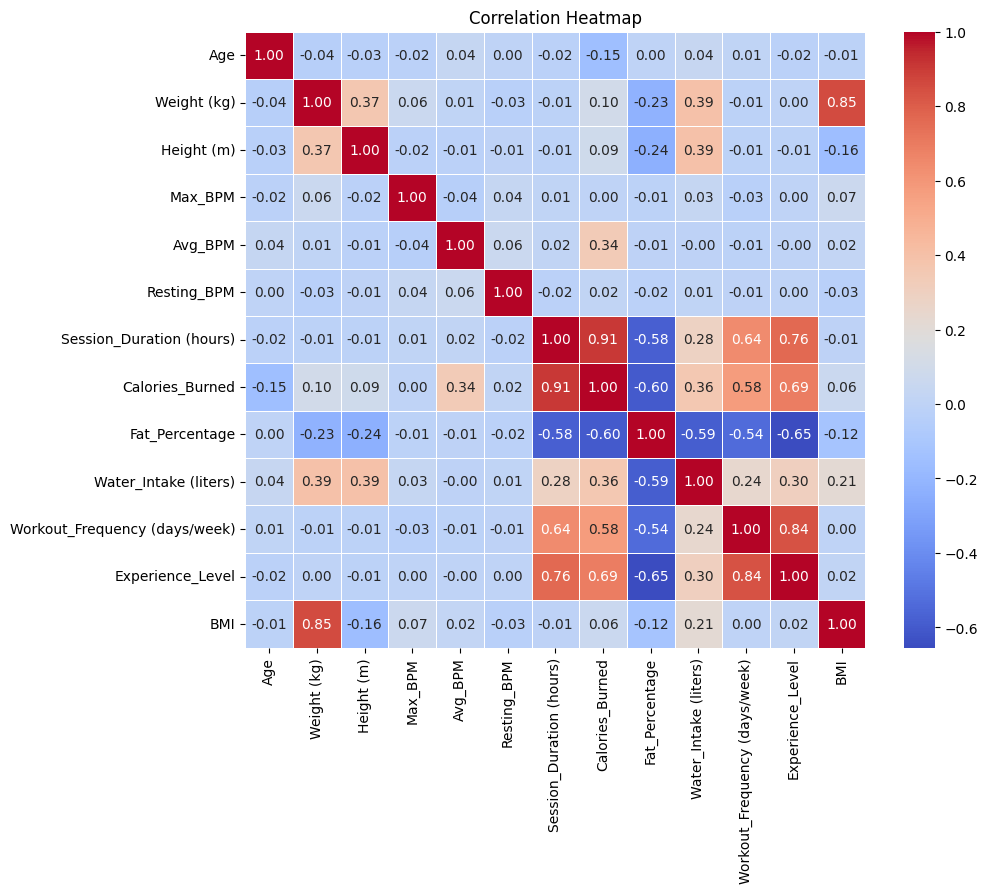

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(gymCorr, fmt=".2f" ,annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Observation:

The x-axis and y-axis both list the variables which include Age, Weight (kg), Height (m), Max_BPM, Avg_BPM, Resting_BPM, Session_Duration (hours), Calories_Burned, Fat_Percentage, Water_intake (liters), Workout_Frequency (days/week), Experience_Level, and BMI.

<br>

1 . Color Scale:
* The color scale on the right ranges from -0.6 to 1.0.
* Red indicates a strong positive correlation (close to 1).
* Blue indicates a strong negative correlation (close to -1).
* White or light colors indicate weak or no correlation (close to 0).

2 . Strong Positive Correlations: As one variable increases, the other variable also tends to increase.

* Weight (kg) and BMI: 0.85
* Height (m) and Weight (kg): 0.37
* Session_Duration (hours) and Calories_Burned: 0.91
* Workout_Frequency (days/week) and Experience_Level: 0.84
* Experience_Level and BMI: 0.84
* Session_Duration (hours) and Experience_Level: 0.76
* Water_Intake (liters) and Height: 0.39
* Water_Intake (liters) and Weight: 0.39
* Calories_Burned and Avg_BPM: 0.34
* Water_Intake (liters) and Session_Duration (hours): 0.28
* Calories_Burned and Water_Intake (liters): 0.36
* Workout_Frequency (days/week) and Session_Duration (hours): 0.64
* Calories_Burned and Experience_Level: 0.69 

3 . Strong Negative Correlations: As one variable increases, the other variable tends to decrease. 

* Age and Calories_Burned: -0.15
* Weight and Fat_Percentage: -0.23 
* Height and Fat_Percentage: -0.24 
* Fat_Percentage and Workout_Frequency (days/week): -0.54
* Fat_Percentage and Experience_Level: -0.65
* Height and BMI: -0.16  
* Fat_Percentage and BMI: -0.12
* Water_Intake (liters) and Fat_Percentage: -0.59 
* Calories_Burned and Fat_Percentage: -0.60
* Session_Duration (hours) and Fat_Percentage: -0.58


4 . Weak or No Correlations:
* Many cells are light-colored, indicating weak or no correlation between those variables. For example, Age has weak correlations with most other variables except for Height and Fat_Percentage.

<br>

This heatmap provides a quick visual summary of how different fitness and health-related variables are interrelated, which can be useful for various applications in health, fitness, and wellness.



.

### Bar Graph 
A bar graph compares categories using rectangular bars.

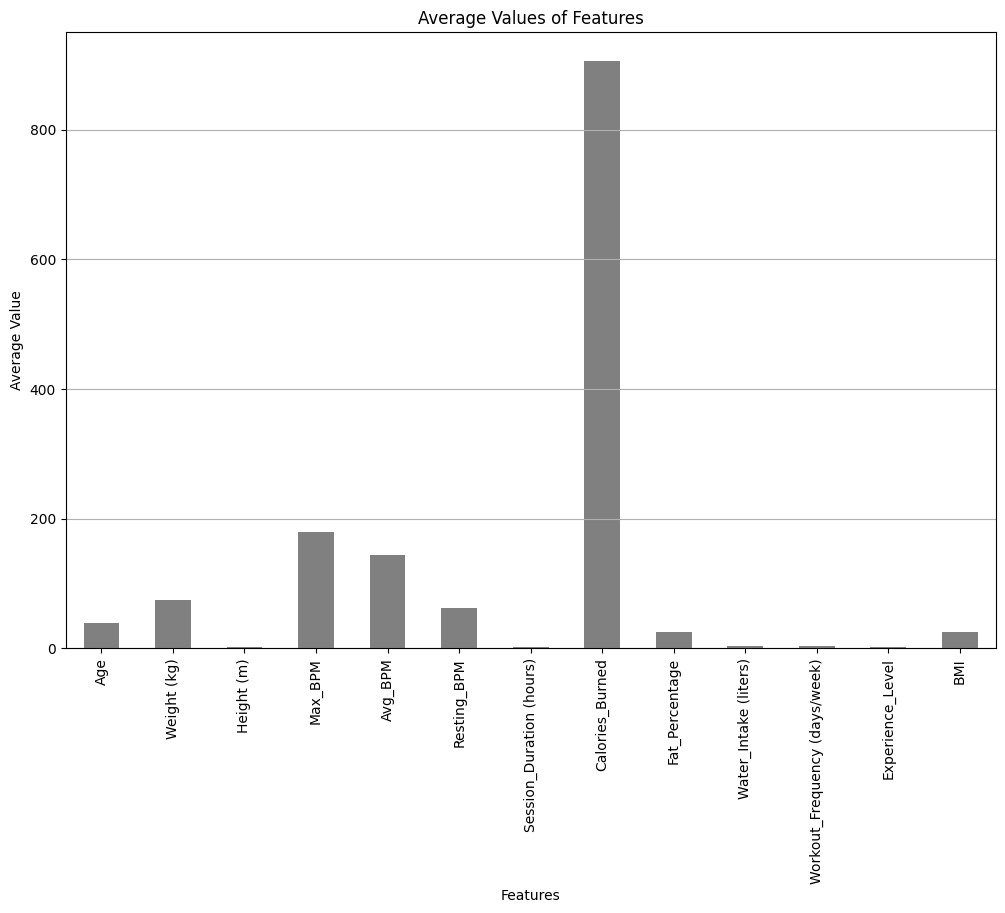

In [22]:
means = numGymData.mean()

plt.figure(figsize=(12, 8))
means.plot(kind='bar', color='grey')
plt.title('Average Values of Features')
plt.xlabel('Features')
plt.ylabel('Average Value')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show() 

Observations:

* Calories_Burned: This feature has the highest average value, significantly higher than the others, reaching close to 800. "Calories_Burned," which stands out due to its significantly higher average value compared to the other features.
* Max_BPM and Avg_BPM: These features have the next highest average values, both around 180.
* Weight (kg): This feature has an average value slightly above 100.
* Resting_BPM: This feature has an average value around 70.
* Age, Height (m), Fat_Percentage, Water_Intake (liters), Workout_Frequency (days/week), Experience_Level, Session_Duration (hours) and BMI: These features have relatively low average values, all below 50.


.

### Visualizing The Dataset Using Histogram

### Age Histogram Graph 

[]

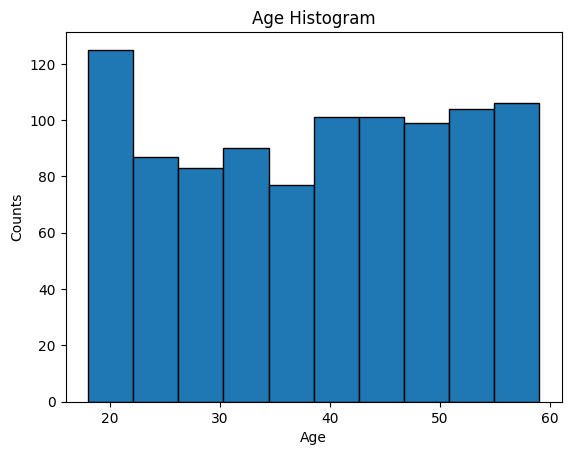

In [23]:
plt.hist(numGymData["Age"], bins=10, edgecolor='black')

plt.title('Age Histogram')
plt.xlabel('Age') 
plt.ylabel('Counts')
plt.plot() 

Observations:



The age group 20yrs has the highest number of individuals who are dominating the whole graph they surpasses over a ratio of 120 whereas the age group 35yrs to 40yrs has the lowest number of individuals around a ratio of 78 or 79. While most of the age groups from 39yrs to 59yrs has the ratio of counts around 100 and so.  

### Weight (kg) Histogram Graph 

[]

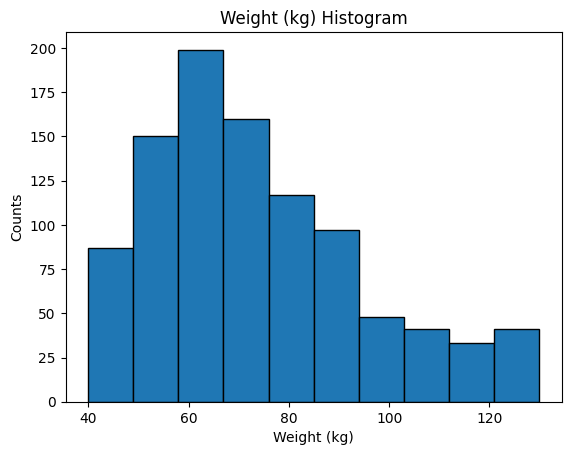

In [24]:
plt.hist(numGymData["Weight (kg)"], bins=10, edgecolor='black')

plt.title('Weight (kg) Histogram')
plt.xlabel('Weight (kg)') 
plt.ylabel('Counts')
plt.plot()

Observations:

The histogram shows a roughly bell-shaped (normal) distribution, with most of the data concentrated around the center.

The distribution appears to be slightly right-skewed, meaning there is a longer tail on the right side of the distribution (towards higher weights).

The weight graph indicates that the weight of around 59kg to 65kg is the highest category with over 200 frequency. Whereas weight of 110kg to 121kg are the lowest scoring a frequency of occurance around 26. The rest of the weight vary.


### Height (m) Histogram Graph

[]

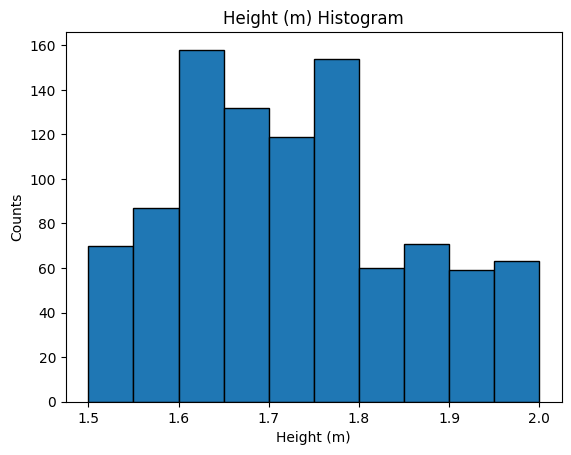

In [25]:
plt.hist(numGymData["Height (m)"], bins=10, edgecolor='black')

plt.title('Height (m) Histogram')
plt.xlabel('Height (m)') 
plt.ylabel('Counts')
plt.plot() 

Observations:

The majority of the heights are clustered around two central points, around 1.6 meters and 1.8 meters. Whereas The highest bar is around 1.6 meters and 1.8 meters. 

### "Max_BPM","Avg_BPM","Resting_BPM" Histogram Graph 

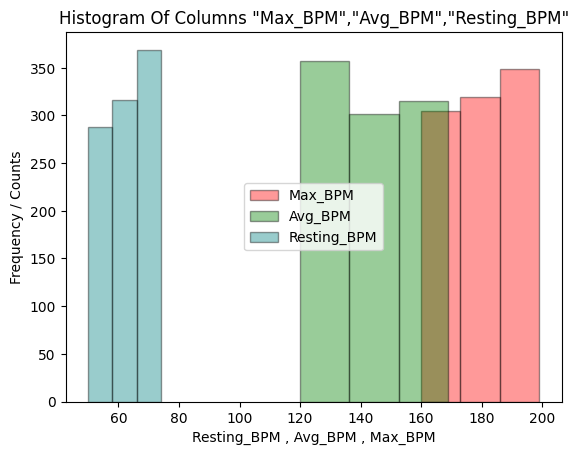

In [26]:
colors = ['red', 'green', 'teal']

for i, column in enumerate(numGymData[["Max_BPM","Avg_BPM","Resting_BPM"]]):
    plt.hist(numGymData[column], bins=3, color=colors[i], alpha=0.4, label=column , edgecolor='black')

plt.title('Histogram Of Columns "Max_BPM","Avg_BPM","Resting_BPM"')
plt.xlabel('Resting_BPM , Avg_BPM , Max_BPM')
plt.ylabel('Frequency / Counts')
plt.legend(loc='center')  
 
plt.show()


Observations:

Colors:
red colour is representing Max_BPM
green colour is representing Avg_BPM
teal colour is representing Resting_BPM

Max_BPM values are generally higher, clustering around 160-200 BPM.
Avg_BPM values are moderate, with a peak around 120-160 BPM.
Resting_BPM values are lower, with a peak around 50-74 BPM.

Here , we have also observed that Avg_BPM and Max_BPM is overlapping around 160 BPM to 170 BPM showing a common occurance in both the groups.


### Session_Duration (hours) Histogram Graph

[]

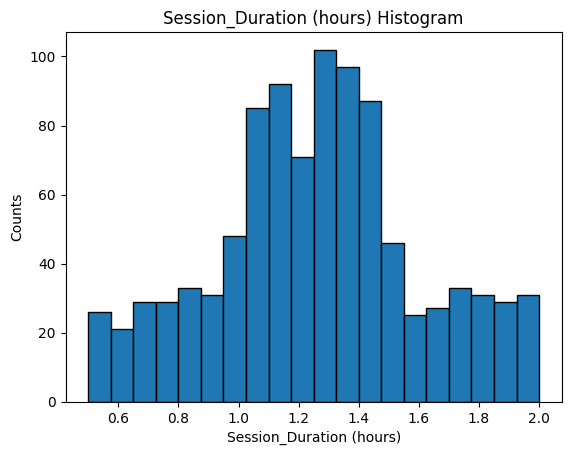

In [27]:
plt.hist(numGymData["Session_Duration (hours)"], bins=20, edgecolor='black')

plt.title('Session_Duration (hours) Histogram') 
plt.xlabel('Session_Duration (hours)') 
plt.ylabel('Counts')
plt.plot()  

Observations:

Around 1.1 to 1.4 session_duration there is huge frequency recorded which is around 75 to 100 , which indicates that the most session durations lies within this range whereas we also observed 0.6 to be the least recorded session duration only with 20 occuring frequency.

### Calories_Burned Histogram Graph

[]

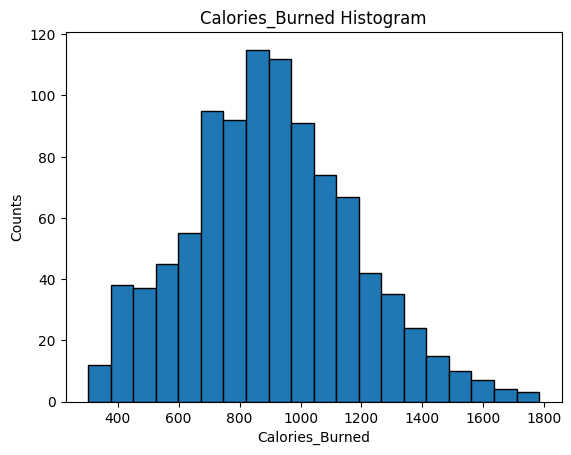

In [28]:
plt.hist(numGymData["Calories_Burned"], bins=20, edgecolor='black')

plt.title('Calories_Burned Histogram')
plt.xlabel('Calories_Burned') 
plt.ylabel('Counts') 
plt.plot() 

Observations:

The Calories_Burned histogram shows a (normal) distribution, with most of the data concentrated around the center. We can also observe a little right skewness.

Most of the Calories_Burned ratio of 800 to 1000 occurs with a frequency of 116 and so. whereas 400 to 700 Calories_Burned ratio grows with occuring frequency from 10 to 55. On the other end from the frequency counts of the Calories_Burned ratio of 1100 falls from 75 counts to a minimum of 2 or 3 with Calories_Burned ratio of 1800.

### Fat_Percentage Histogram Graph

[]

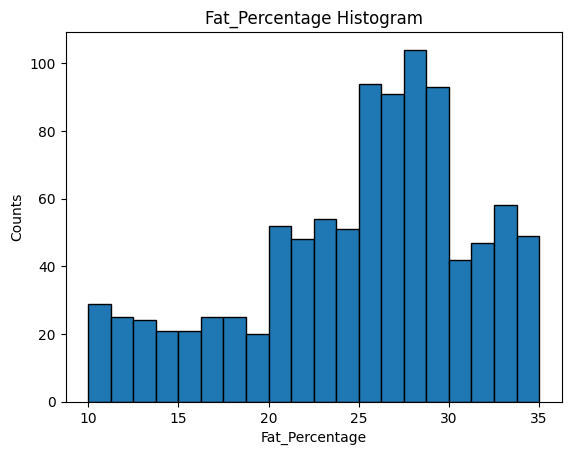

In [143]:
plt.hist(numGymData["Fat_Percentage"], bins=20, edgecolor='black')

plt.title('Fat_Percentage Histogram')
plt.xlabel('Fat_Percentage') 
plt.ylabel('Counts') 
plt.plot()  

Observations:

The Fat_Percentage histogram shows left skewness.

25 to 30 is the highest Fat_Percentage occurs with 90 to 110 frequency. Whereas 10 to 19 is the lowest recorded Fat_Percentage occurs with 30 to 20 frequency only.



[]

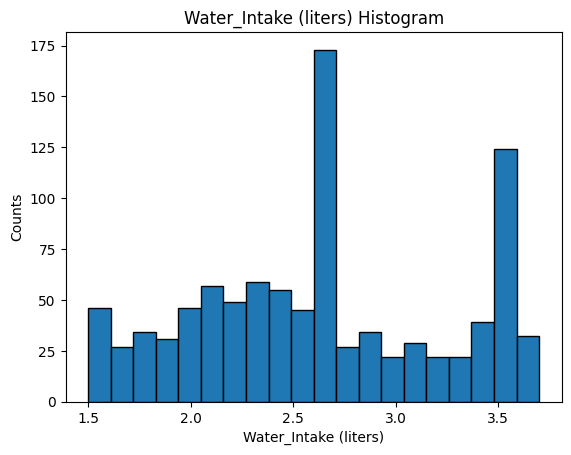

In [144]:
plt.hist(numGymData["Water_Intake (liters)"], bins=20, edgecolor='black')

plt.title('Water_Intake (liters) Histogram')
plt.xlabel('Water_Intake (liters)') 
plt.ylabel('Counts')
plt.plot() 

Observations:

2.7 liters is the highest Water_Intake (liters) with a count of 173. Whereas 3.5 liters is followed to be the second most highest bar with a frequency of 125. 

1.5 and 2.0 to 2.5 liters shows similar occurance with a frequency range of 46 to 52.


### Workout_Frequency (days/week) Histogram Graph

[]

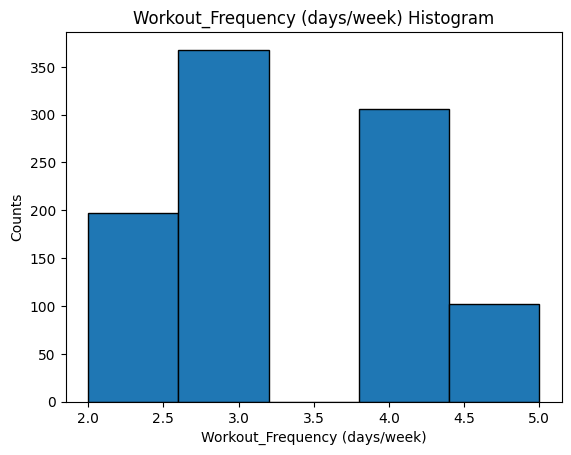

In [145]:
plt.hist(numGymData["Workout_Frequency (days/week)"], bins=5, edgecolor='black')

plt.title('Workout_Frequency (days/week) Histogram')
plt.xlabel('Workout_Frequency (days/week)') 
plt.ylabel('Counts')
plt.plot() 

Observations:

2.5 to 3.0 is the highest Workout_Frequency (days/week) with a frequency range of 350 and above. Followed by 3.9 to 4.4 Workout_Frequency to be the second with a frequency range of 300 , whereas 2.0 to 2.5 Workout_Frequency is the third most occuring with a frequency count of 200 and at last 4.5 to 5.0 Workout_Frequency ranging at 100 frequency occurance.


### Experience_Level Histogram Graph

[]

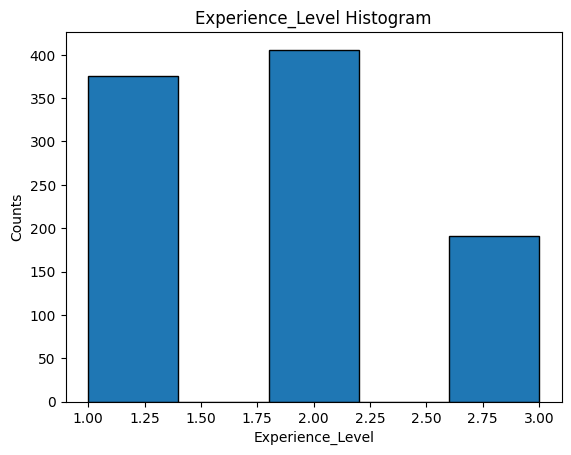

In [146]:
plt.hist(numGymData["Experience_Level"], bins=5, edgecolor='black')

plt.title('Experience_Level Histogram') 
plt.xlabel('Experience_Level') 
plt.ylabel('Counts')
plt.plot() 

Observations:

The Experience_Level histogram graph has only three bars. 2.0 Experience_Level is the highest bar with a frequency of 400 and 1.00 to 1.30 Experience_Level is the second most bar with a frequency of 370. And at last the third bar is 2.75 to 3.00 Experience_Level which has around 190 frequency counts.

### BMI Histogram Graph

[]

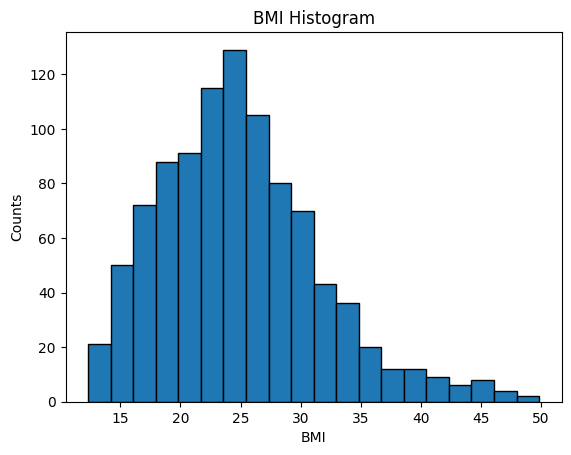

In [147]:
plt.hist(numGymData["BMI"], bins=20, edgecolor='black')

plt.title('BMI Histogram')
plt.xlabel('BMI') 
plt.ylabel('Counts') 
plt.plot() 

The BMI histogram graph a right skewed graph. 

The BMI ratio of 25 is the most tallest bar which shows a frequency count of 130 and so. From 10 to 35 BMI ratio has frequency count of 20 to 110 and after at the other end the number of BMI starts to decline. The BMI number of 40 to 50 has a decline in frequency of 4 , 3 , 2 to 1.


.

### Using Boxplot To Visualize The Dataset

### Age Boxplot Graph

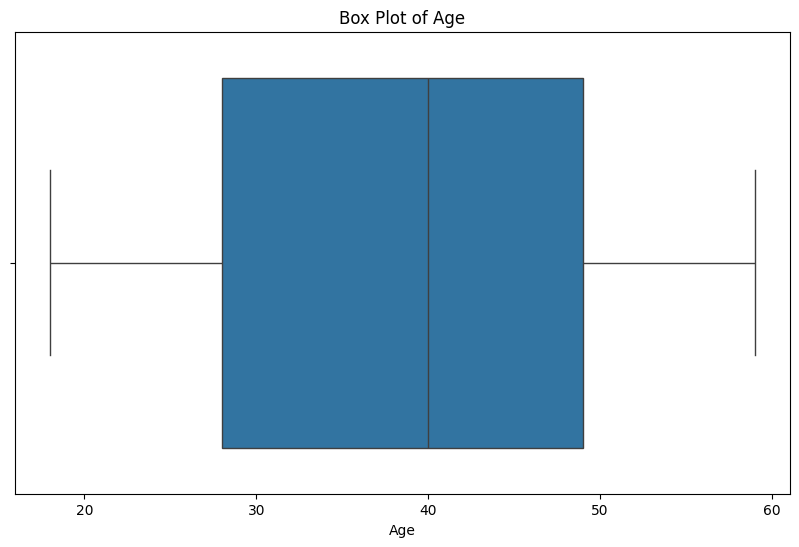

In [148]:
plt.figure(figsize=(10,6 ))
sns.boxplot(x=numGymData["Age"]) 
plt.title('Box Plot of Age')
plt.show() 

Observations:

From lower quartile to upper quartile the Age ranges between 28 to 49. The Median is Age 40. The 59yrs is the upper extreme whereas 18yrs is the lower extreme. There are no outliers to be found.


### Weight (kg) Boxplot Graph

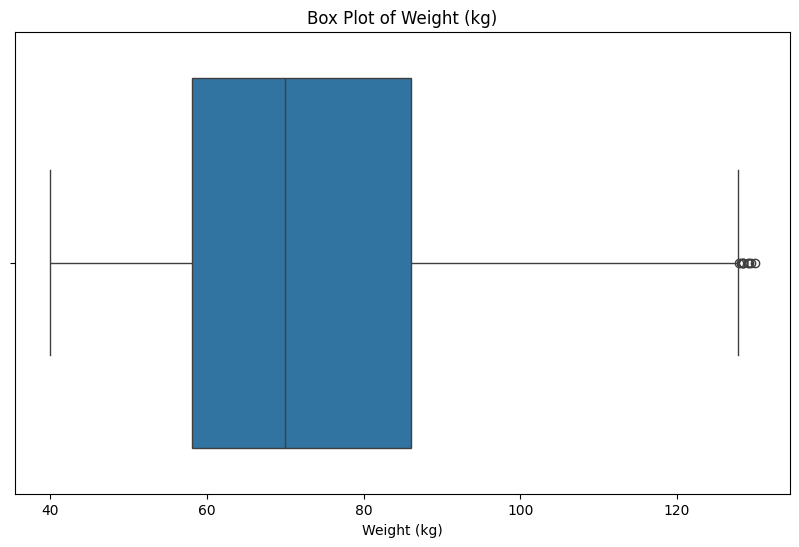

In [149]:
plt.figure(figsize=(10,6 ))
sns.boxplot(x=numGymData["Weight (kg)"]) 
plt.title('Box Plot of Weight (kg)')
plt.show() 

Observations:

The weights 59kg to 88kg ranges from lower quartile to upper quartile. An approximate of 68kg to 69kg is the median value. 40kg is the lower extreme recorded whereas 130 is to be the upper extreme. The boxplot surely indicates a few outliers to be presented beyond the weight of 120kg and so.


### Height (m) Boxplot Graph

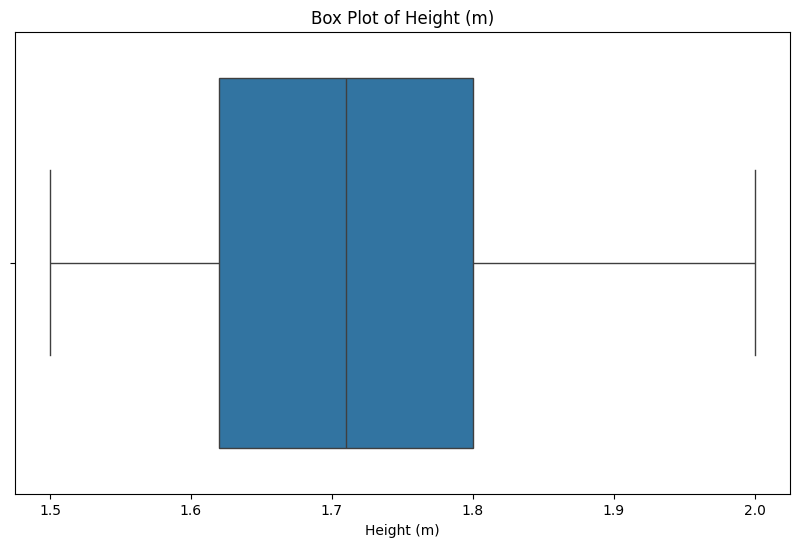

In [150]:
plt.figure(figsize=(10,6 ))
sns.boxplot(x=numGymData["Height (m)"]) 
plt.title('Box Plot of Height (m)') 
plt.show()  

Observations: 

1.6 meters to 1.8 meters is the lower and upper quartile. 1.7 meters is recorded to be the median. 1.5 meters is the lower extreme and 2.0 is the upper extreme. There are no outliers to be seen in the graph.


### Max_BPM Boxplot Graph

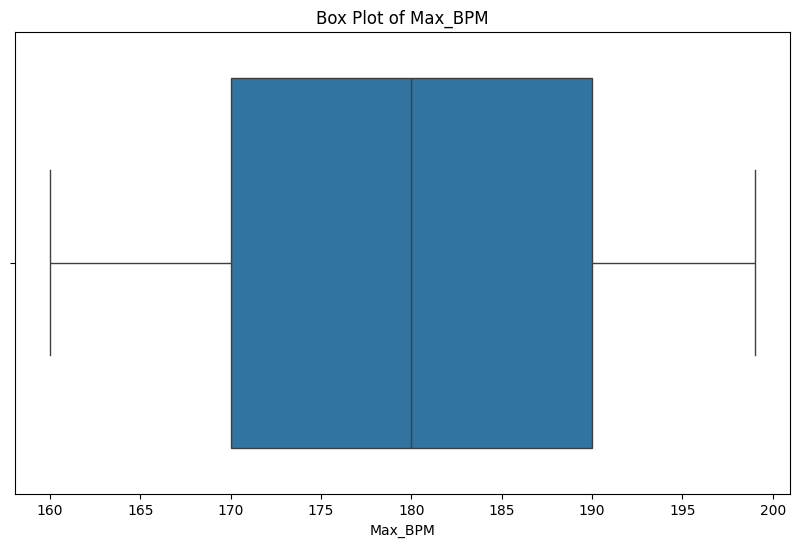

In [151]:
plt.figure(figsize=(10,6 ))
sns.boxplot(x=numGymData["Max_BPM"]) 
plt.title('Box Plot of Max_BPM')
plt.show() 

Observations:

Maximum BPM from lower to upper quartile ranges from 170 to 190 BPM. The lower extreme scores 160 BPM and the upper extreme scores 190 BPM. The Median is of 180 BPM. There is no outliers in the graph. 


### Avg_BPM Boxplot Graph

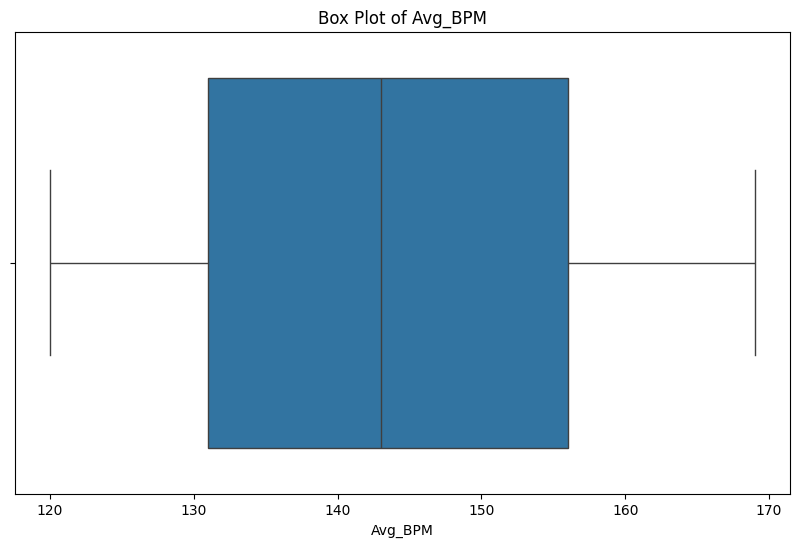

In [152]:
plt.figure(figsize=(10,6 ))
sns.boxplot(x=numGymData["Avg_BPM"]) 
plt.title('Box Plot of Avg_BPM')
plt.show() 

Observations:

Average BPM from lower to upper quartile ranges from 131 to 158 BPM. The lower extreme scores 120 BPM and the upper extreme scores 169 BPM. The Median is of 143 BPM. There is no outliers in the graph.


### Resting_BPM Boxplot Graph

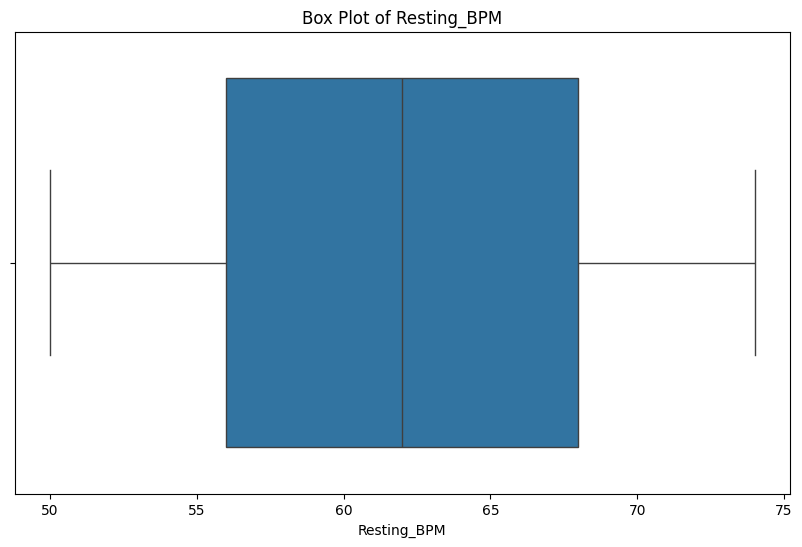

In [153]:
plt.figure(figsize=(10,6 ))
sns.boxplot(x=numGymData["Resting_BPM"]) 
plt.title('Box Plot of Resting_BPM')
plt.show() 

Observations:

Resting BPM from lower to upper quartile ranges from 56 to 68 BPM. The lower extreme scores 50 BPM and the upper extreme scores 74 BPM. The Median is 62 BPM. There is no outliers in the graph.


### Session_Duration (hours) Boxplot Graph

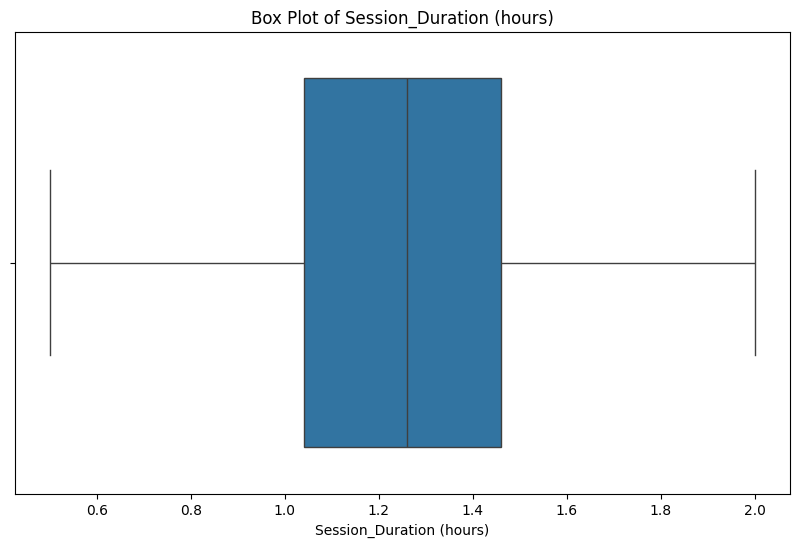

In [154]:
plt.figure(figsize=(10,6 ))
sns.boxplot(x=numGymData["Session_Duration (hours)"]) 
plt.title('Box Plot of Session_Duration (hours)')
plt.show() 

Observations:

Session Duration of 1.1 to 1.5 hours ranges from lower quartile to upper quartile. The lowest extreme is around 0.4 hours and the upper extreme is 2.0 hours. The median is 1.3 hours. In this graph there is no outliers to be seen.

### Calories_Burned Boxplot Graph

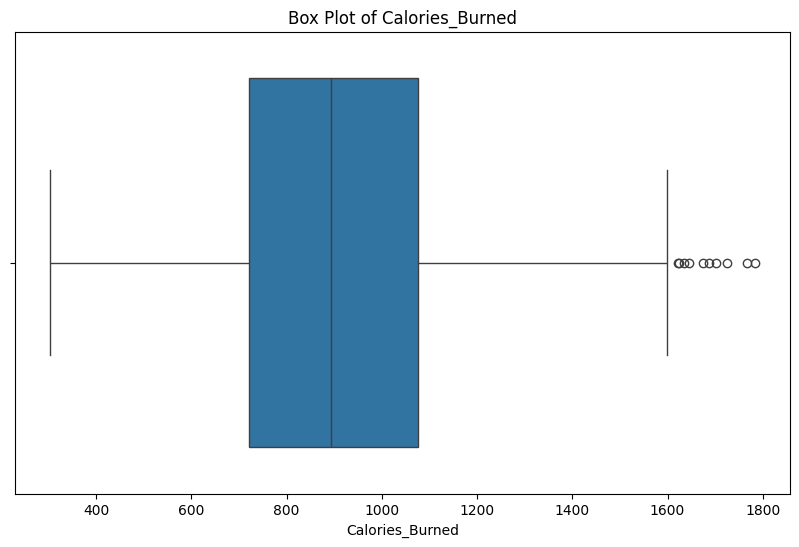

In [155]:
plt.figure(figsize=(10,6 ))
sns.boxplot(x=numGymData["Calories_Burned"]) 
plt.title('Box Plot of Calories_Burned')
plt.show()  

Observations:

As we can observe the lower and upper quartile ranges from 750 to 1150 calories. The median of 50% lies within 900 calories. The lower extreme is of below 400 calories and upper extreme is of 1600 calories. There are outliers in the graph which lies beyond 1600 calories ranging to 1800 calories.


### Fat_Percentage Boxplot Graph

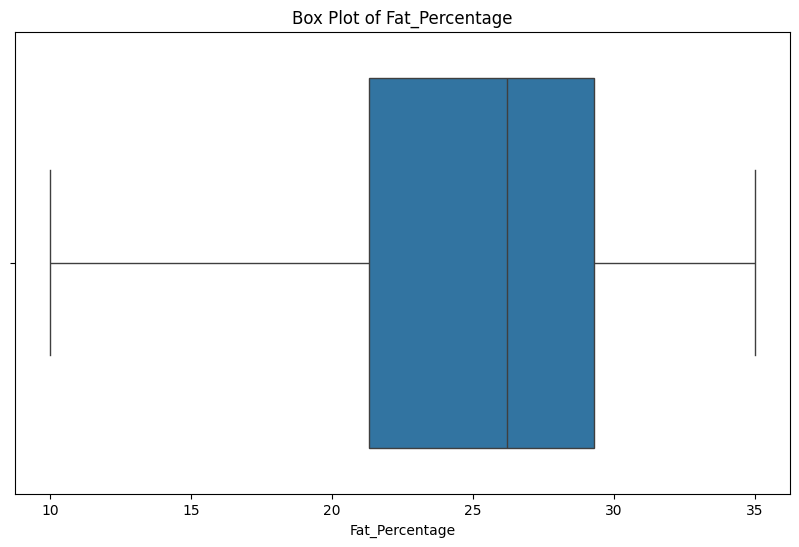

In [156]:
plt.figure(figsize=(10,6 ))
sns.boxplot(x=numGymData["Fat_Percentage"]) 
plt.title('Box Plot of Fat_Percentage')
plt.show() 

Observations:

The lower quartile 25% range from 22 to 26 for the fat_percentage. The upper quartile 75% ranges from 29 to 27 fat percentage. Whereas the median 50% lies within 26 fat percentage. The lowest extreme recorded is 10 fat percentage and the upper extreme is 35 fat percentage. There are no outliers to be seen.


### Water_Intake (liters) Boxplot Graph

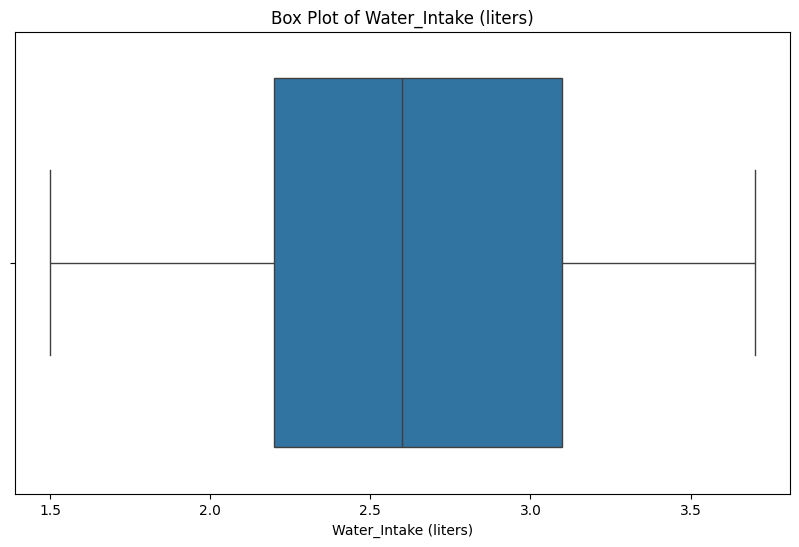

In [29]:
plt.figure(figsize=(10,6 ))
sns.boxplot(x=numGymData["Water_Intake (liters)"]) 
plt.title('Box Plot of Water_Intake (liters)')
plt.show() 

Observations:

A significant 25% which is lower quartile for the water intake ranges from 2.1 to 2.5 liters. 75% which is upper quartile ranges from 2.7 to 3.2 liters. The median 50% lies within 2.6 liters. The lower extreme is of 1.5 liters and the upper extreme is beyond 3.5 liters maybe around 3.7 and so. There are to be no outliers to be seen in the graph.


### Workout_Frequency (days/week) Boxplot Graph 

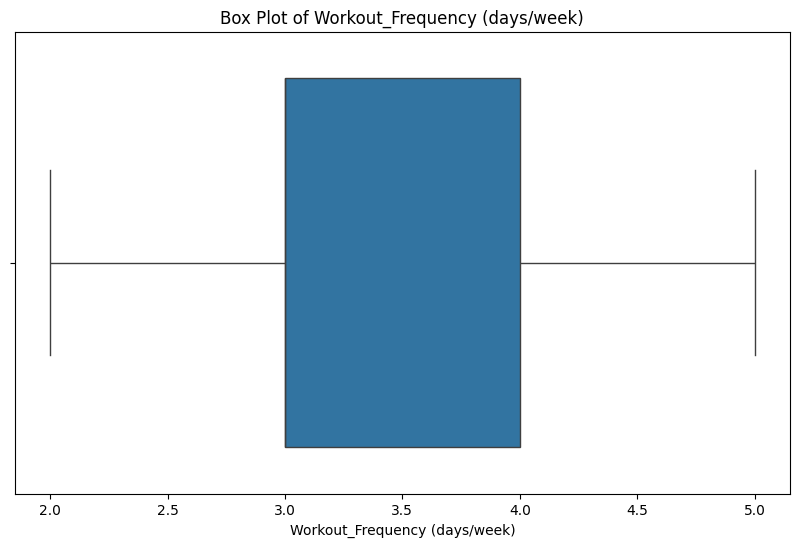

In [30]:
plt.figure(figsize=(10,6 ))
sns.boxplot(x=numGymData["Workout_Frequency (days/week)"]) 
plt.title('Box Plot of Workout_Frequency (days/week)')
plt.show() 

Observations:

The lower quartile is of 3.0 and the upper quartile is of 4.0 with no median at all. The lower extreme records 2.0 and the upper extreme is of 5.0. There is no outlier in the graph.


### Experience_Level Boxplot Graph

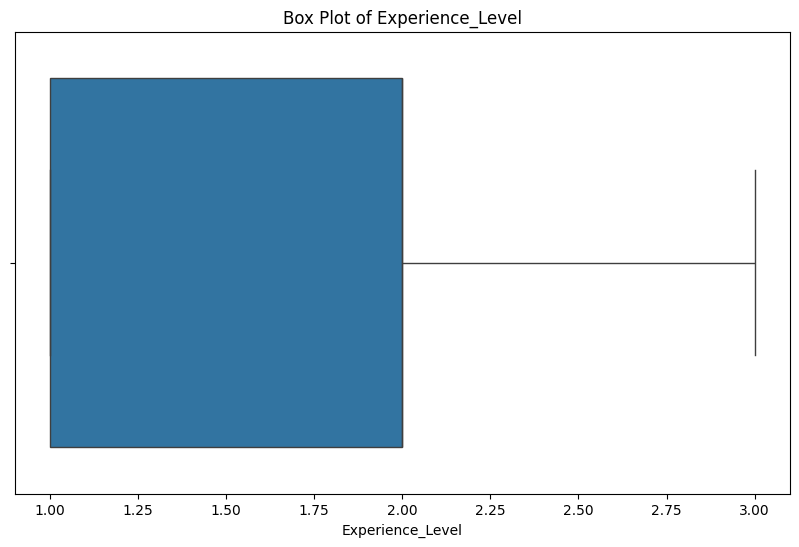

In [31]:
plt.figure(figsize=(10,6 ))
sns.boxplot(x=numGymData["Experience_Level"]) 
plt.title('Box Plot of Experience_Level')
plt.show()  

Observations:

There are no lower extreme to be seen in the graph where the lower quartile starts at 1.00 experience level and the upper quartile starts at 2.00 experience level with no median. The upper extreme is of 3.00 experience level. The graph has no outliers. 


### BMI Boxplot Graph 

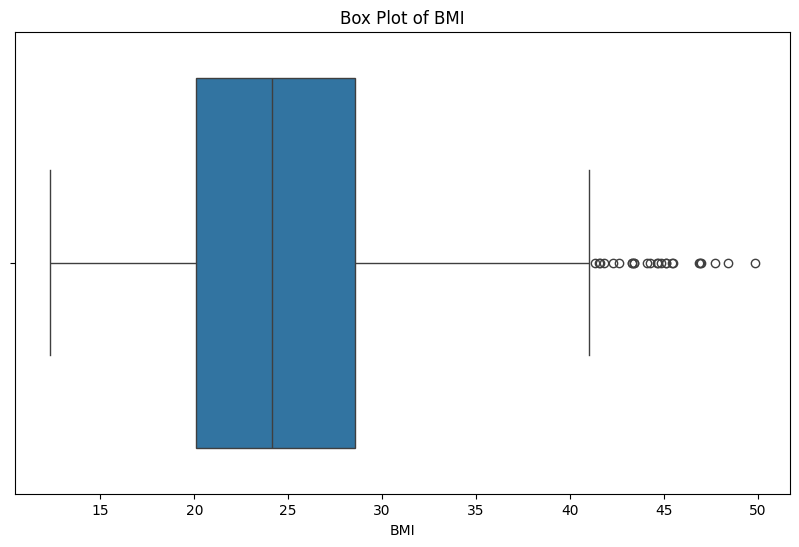

In [32]:
plt.figure(figsize=(10,6 ))
sns.boxplot(x=numGymData["BMI"]) 
plt.title('Box Plot of BMI')
plt.show()  

Observations:

The 25% of the lower quartile ranges from 20 to 23 BMI whereas the upper quartile 75% ranges from 28 to 25 and the median 50% is of 24 BMI. The upper extreme is of 42 and beyond 42 lies the outliers ranging from 42 to 50 BMI.


### Boxplot of the dataset

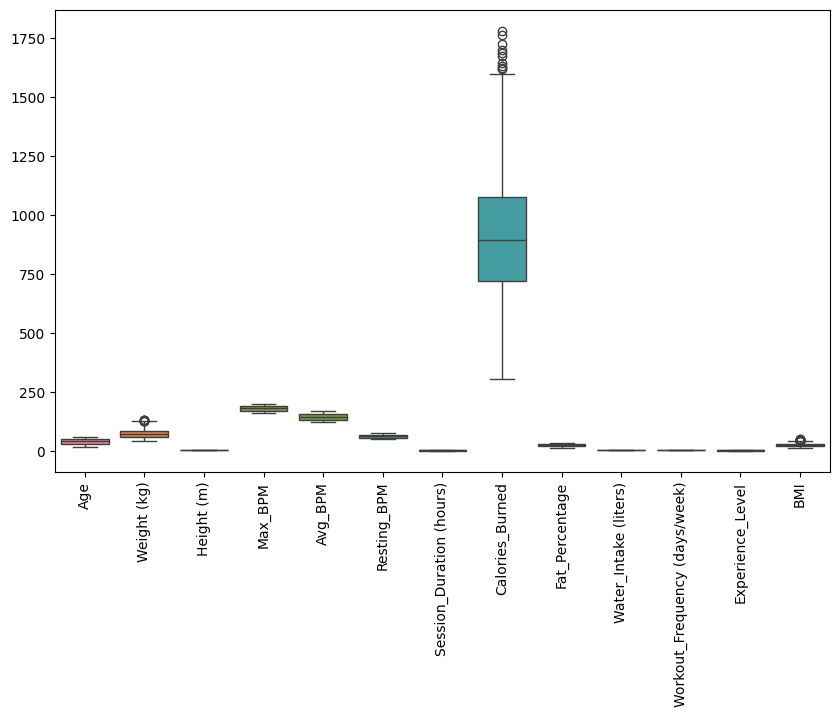

In [33]:
plt.figure(figsize=(10,6)) 
sns.boxplot(numGymData) 
plt.xticks(ticks=range(len(numGymData.columns)), labels=numGymData.columns, rotation=90)
plt.show()

Observations: 

Most variables have a narrow IQR, indicating that the data is relatively concentrated around the median. However, there are outliers in each variable, suggesting some individuals have values significantly different from the majority. The variable "Calories_Burned" shows the widest IQR and the most outliers, indicating a broader range and more variability in this metric compared to others.



### Pairplot

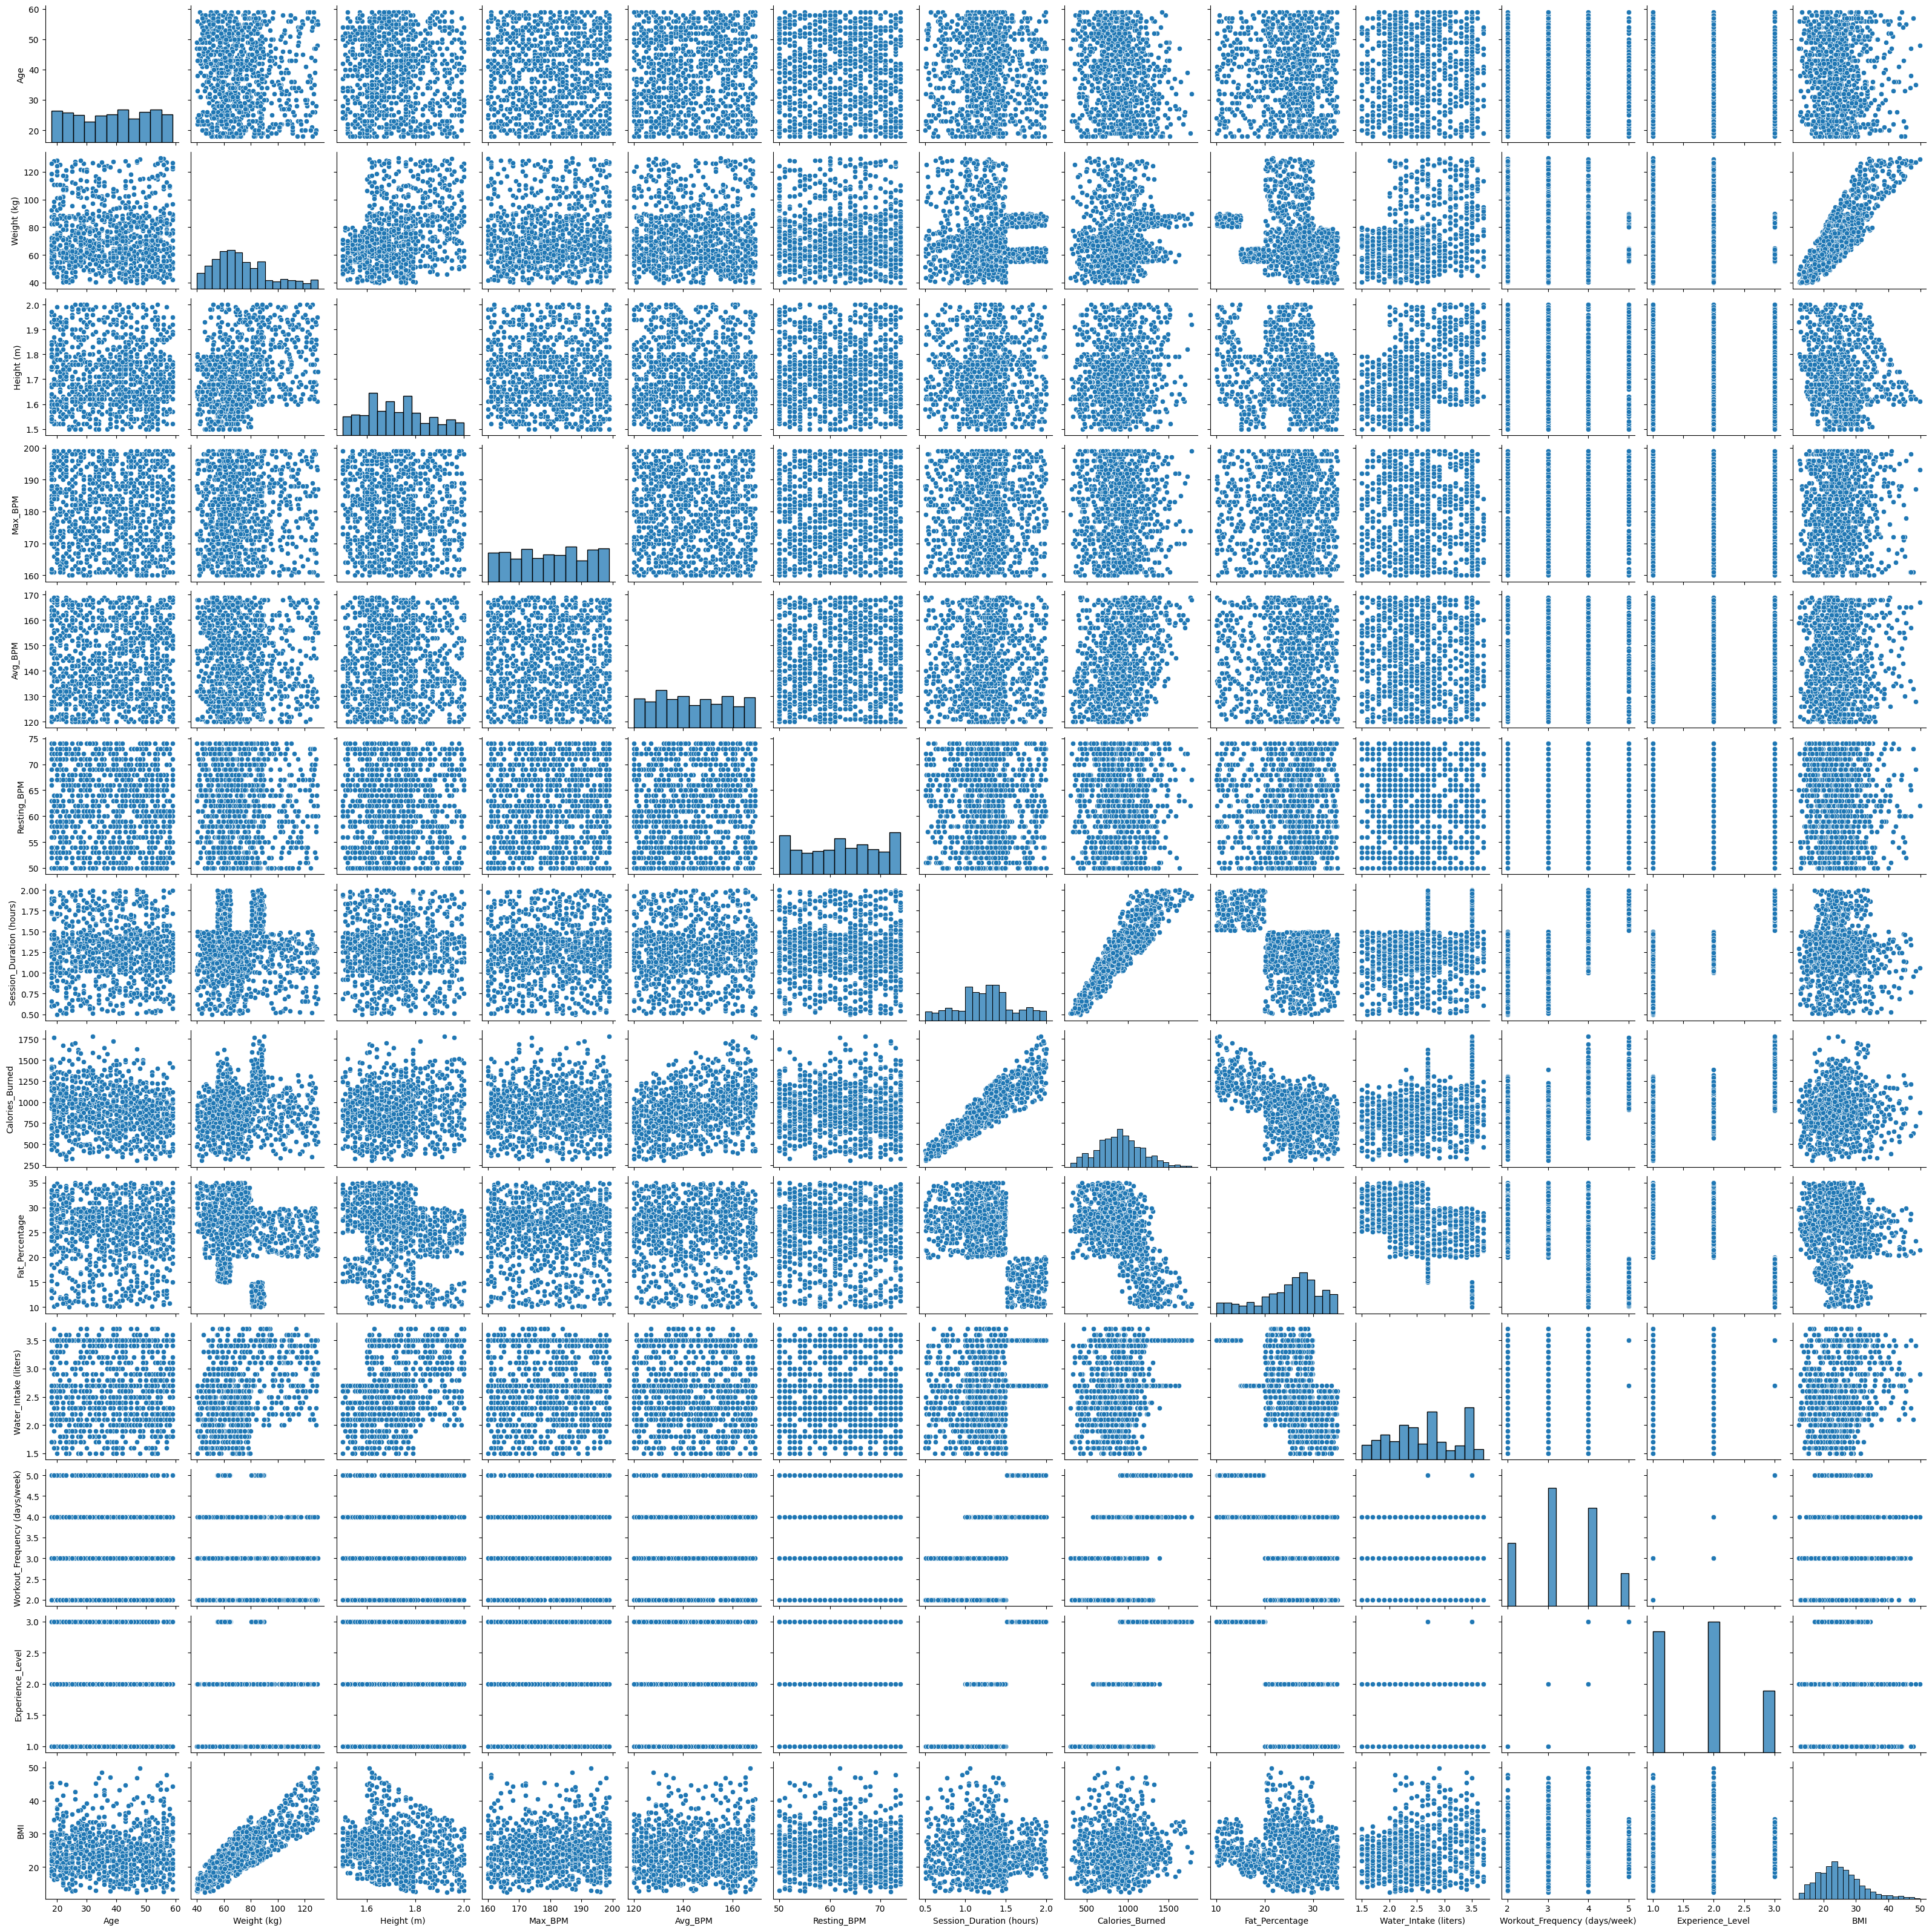

In [34]:
sns.pairplot(numGymData)

Observations:

* There appears to be a positive correlation between "Age" and "Experience_Level," indicating that older individuals tend to have more experience.
* "Calories_Burned" seems to have a positive correlation with "Session_Duration," suggesting that longer workout sessions result in more calories burned.
* "Weight" and "BMI" show a strong positive correlation, which is expected since BMI is calculated using weight and height.

.

### Creating Copy Of The Dataset "gymData"

This is useful when we want to make changes to the DataFrame without affecting the original data.


In [35]:
newGymDataCopy = gymData.copy() 

### Handling Outliers

Handling outliers involves identifying and treating data points that significantly differ from other observations. Methods include removal, transformation, or using robust statistical techniques that minimize their impact.

As we earlier observed the columns 'Weight (kg)', 'BMI', 'Calories_Burned' have a significant outliers which needs to be handled.

Using IQR to handle the outliers. Interquartile Range (IQR) helps identify outliers by measuring the middle 50% of the data. Outliers are detected if they lie below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR. 


Using IQR (Interquartile Range) for handling outliers is beneficial because it:
* Captures Middle Spread: Focuses on the central 50% of data.
* Reduces Skewness: Minimizes the impact of extreme values.
* Simple Calculation: Easy to compute and apply.




In [38]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"Column: {column}, Q1: {Q1}, Q3: {Q3}, IQR: {IQR}, Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return filtered_df 

outlier_features = ['Weight (kg)', 'BMI', 'Calories_Burned'] 
for column in outlier_features: 
    newGymDataCopy = remove_outliers(newGymDataCopy, column) 

Column: Weight (kg), Q1: 57.7, Q3: 82.5, IQR: 24.799999999999997, Lower Bound: 20.500000000000007, Upper Bound: 119.69999999999999
Column: BMI, Q1: 19.73, Q3: 27.5775, IQR: 7.8475, Lower Bound: 7.95875, Upper Bound: 39.34875
Column: Calories_Burned, Q1: 722.25, Q3: 1072.0, IQR: 349.75, Lower Bound: 197.625, Upper Bound: 1596.625


Observations: 

Q1 (1st Quartile): 25th percentile value.

Q3 (3rd Quartile): 75th percentile value.

IQR: Difference between Q3 and Q1.

Lower Bound: Q1 - 1.5 * IQR (lower outlier threshold).

Upper Bound: Q3 + 1.5 * IQR (upper outlier threshold).

<br>

Weight (kg):
* Q1: 57.7, Q3: 82.5, IQR: 24.8
* Lower Bound: 20.5, Upper Bound: 119.7

<br>

BMI:
* Q1: 19.73, Q3: 27.58, IQR: 7.85
* Lower Bound: 7.96, Upper Bound: 39.35

<br>

Calories Burned:
* Q1: 722.25, Q3: 1072.0, IQR: 349.75
* Lower Bound: 197.63, Upper Bound: 1596.63


.

### Using "describe()" Descriptive Statistics for Selected Features

In [39]:
newGymDataCopy[outlier_features].describe().T 

count        mean         std     min     25%     50%  \
Weight (kg)      901.0   70.461598   17.644621   40.00   57.50   68.00   
BMI              901.0   23.861365    5.453093   12.32   19.73   23.76   
Calories_Burned  901.0  899.410655  262.582423  303.00  722.00  888.00   

                     75%     max  
Weight (kg)        82.20   118.4  
BMI                27.57    39.3  
Calories_Burned  1072.00  1587.0

Observations: 

Weight (kg):
* Mean: 70.46 kg 
* Standard Deviation: 17.64 kg
* Min: 40.00 kg, 
* 25th percentile: 57.50 kg, 
* Median: 68.00 kg, 
* 75th percentile: 82.20 kg,
*  Max: 118.4 kg

BMI:
* Mean: 23.86
* Standard Deviation: 5.45
* Min: 12.32, 
* 25th percentile: 19.73, 
* Median: 23.76, 
* 75th percentile: 27.57, 
* Max: 39.3

Calories Burned:
* Mean: 899.41
* Standard Deviation: 262.58
* Min: 303.00, 
* 25th percentile: 722.00, 
* Median: 888.00, 
* 75th percentile: 1072.00, 
* Max: 1587.0



.

In [40]:
newGymDataCopy.head()

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157           60   
1   46  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   
3   25    Male         53.2        1.70      190      164           56   
4   38    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69           1313.0         Yoga            12.6   
1                      1.30            883.0         HIIT            33.9   
2                      1.11            677.0       Cardio            33.4   
3                      0.59            532.0     Strength            28.8   
4                      0.64            556.0     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0                    3.5                              4                 3   
1                    2.1                              4                 2   
2                    2.3                              4                 2   
3                    2.1                              3                 1   
4                    2.8                              3                 1   

     BMI  
0  30.20  
1  32.00  
2  24.71  
3  18.41  
4  14.39

### Using BoxPlots Visualizing The Selected Columns 

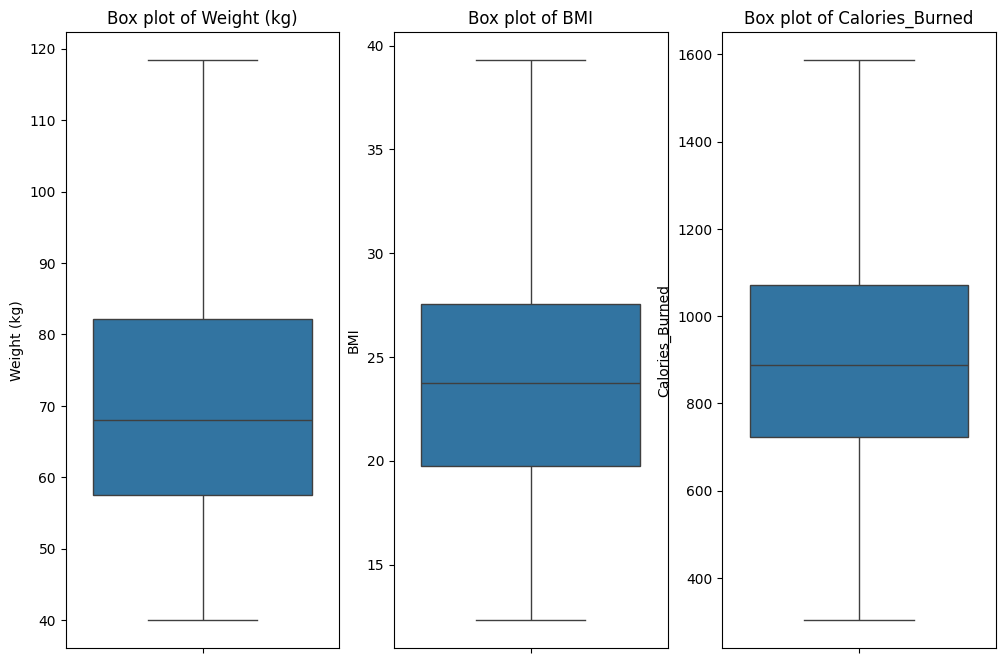

In [41]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(outlier_features, 1):
    plt.subplot(1, len(outlier_features), i)
    sns.boxplot(y=newGymDataCopy[column])
    plt.title(f'Box plot of {column}')  
plt.show()

Summary:

Weight (kg): The majority of weights fall between 60 kg and 80 kg, with a median of around 70 kg. The data is fairly concentrated, with no visible outliers.

BMI: The majority of BMI values fall between 20 and 28, with a median of around 24. The data is concentrated, with no visible outliers.

Calories_Burned: The majority of calories burned fall between 700 and 1100, with a median of around 900. The data is concentrated, with no visible outliers.

Conclusion:

The box plots indicate that the outliers have been effectively removed from the Weight, BMI, and Calories_Burned columns. The data is now more concentrated, with no visible outliers beyond the whiskers. This suggests that the outlier removal process was successful, and the data is ready for further analysis or scaling.


.

### Label Encoder

Using Label Encoder to preprocess the categorical values into numerical. As computers can't really process categorical values, so converting it into numerical for the efficiency. 

With this particular Data Frame "gymData" our goal is to convert the columns "Gender" and "Workout_Type" which have categorical features into numerical.
Creating a function named "encode_columns" which will take a dataframe and the column names and will iterate using for loop while encoding each categorical features into numerical through LabelEncoder(). Simultaneously will create a dictionary to store the LabelEncoder() and the columns passed.
 


### Importing LabelEncoder From "sklearn.preprocessing"

Created the function "encode_columns" that will help in preprocessing the given data

In [42]:
from sklearn.preprocessing import LabelEncoder


columns_to_encode = ["Gender","Workout_Type"]

def encode_columns(dataset, columns):
    label_encoders = {}
    for column in columns: 
        le = LabelEncoder()
        new_encoded_column = column + '_Encoded'
        dataset[new_encoded_column] = le.fit_transform(dataset[column])
        label_encoders[column] = le
    return dataset , label_encoders 

encodedGymDataCopy , label_encoders = encode_columns(newGymDataCopy, columns_to_encode)  

In [43]:
encodedGymDataCopy.head()  


Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157           60   
1   46  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   
3   25    Male         53.2        1.70      190      164           56   
4   38    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69           1313.0         Yoga            12.6   
1                      1.30            883.0         HIIT            33.9   
2                      1.11            677.0       Cardio            33.4   
3                      0.59            532.0     Strength            28.8   
4                      0.64            556.0     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0                    3.5                              4                 3   
1                    2.1                              4                 2   
2                    2.3                              4                 2   
3                    2.1                              3                 1   
4                    2.8                              3                 1   

     BMI  Gender_Encoded  Workout_Type_Encoded  
0  30.20               1                     3  
1  32.00               0                     1  
2  24.71               0                     0  
3  18.41               1                     2  
4  14.39               1                     2

### Displaying Label Encoding

Looping through the dictionary of label encoders. For each column, it prints the name of the column, followed by the mapping of each class label to its corresponding encoded value. This helps to see how categorical labels are transformed into numerical values.


In [44]:
for key, labels in label_encoders.items():
    print(f"\nEncoding for '{key}':")
    for labelNumber, class_names in enumerate(labels.classes_):
        print(f"{class_names}: {labelNumber}")  


Encoding for 'Gender':
Female: 0
Male: 1

Encoding for 'Workout_Type':
Cardio: 0
HIIT: 1
Strength: 2
Yoga: 3


.

In [45]:
encodedGymDataCopy.columns

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI',
       'Gender_Encoded', 'Workout_Type_Encoded'],
      dtype='object')

c:\Users\Sambhu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Sambhu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Sambhu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Sambhu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Sambhu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Sambhu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` bec

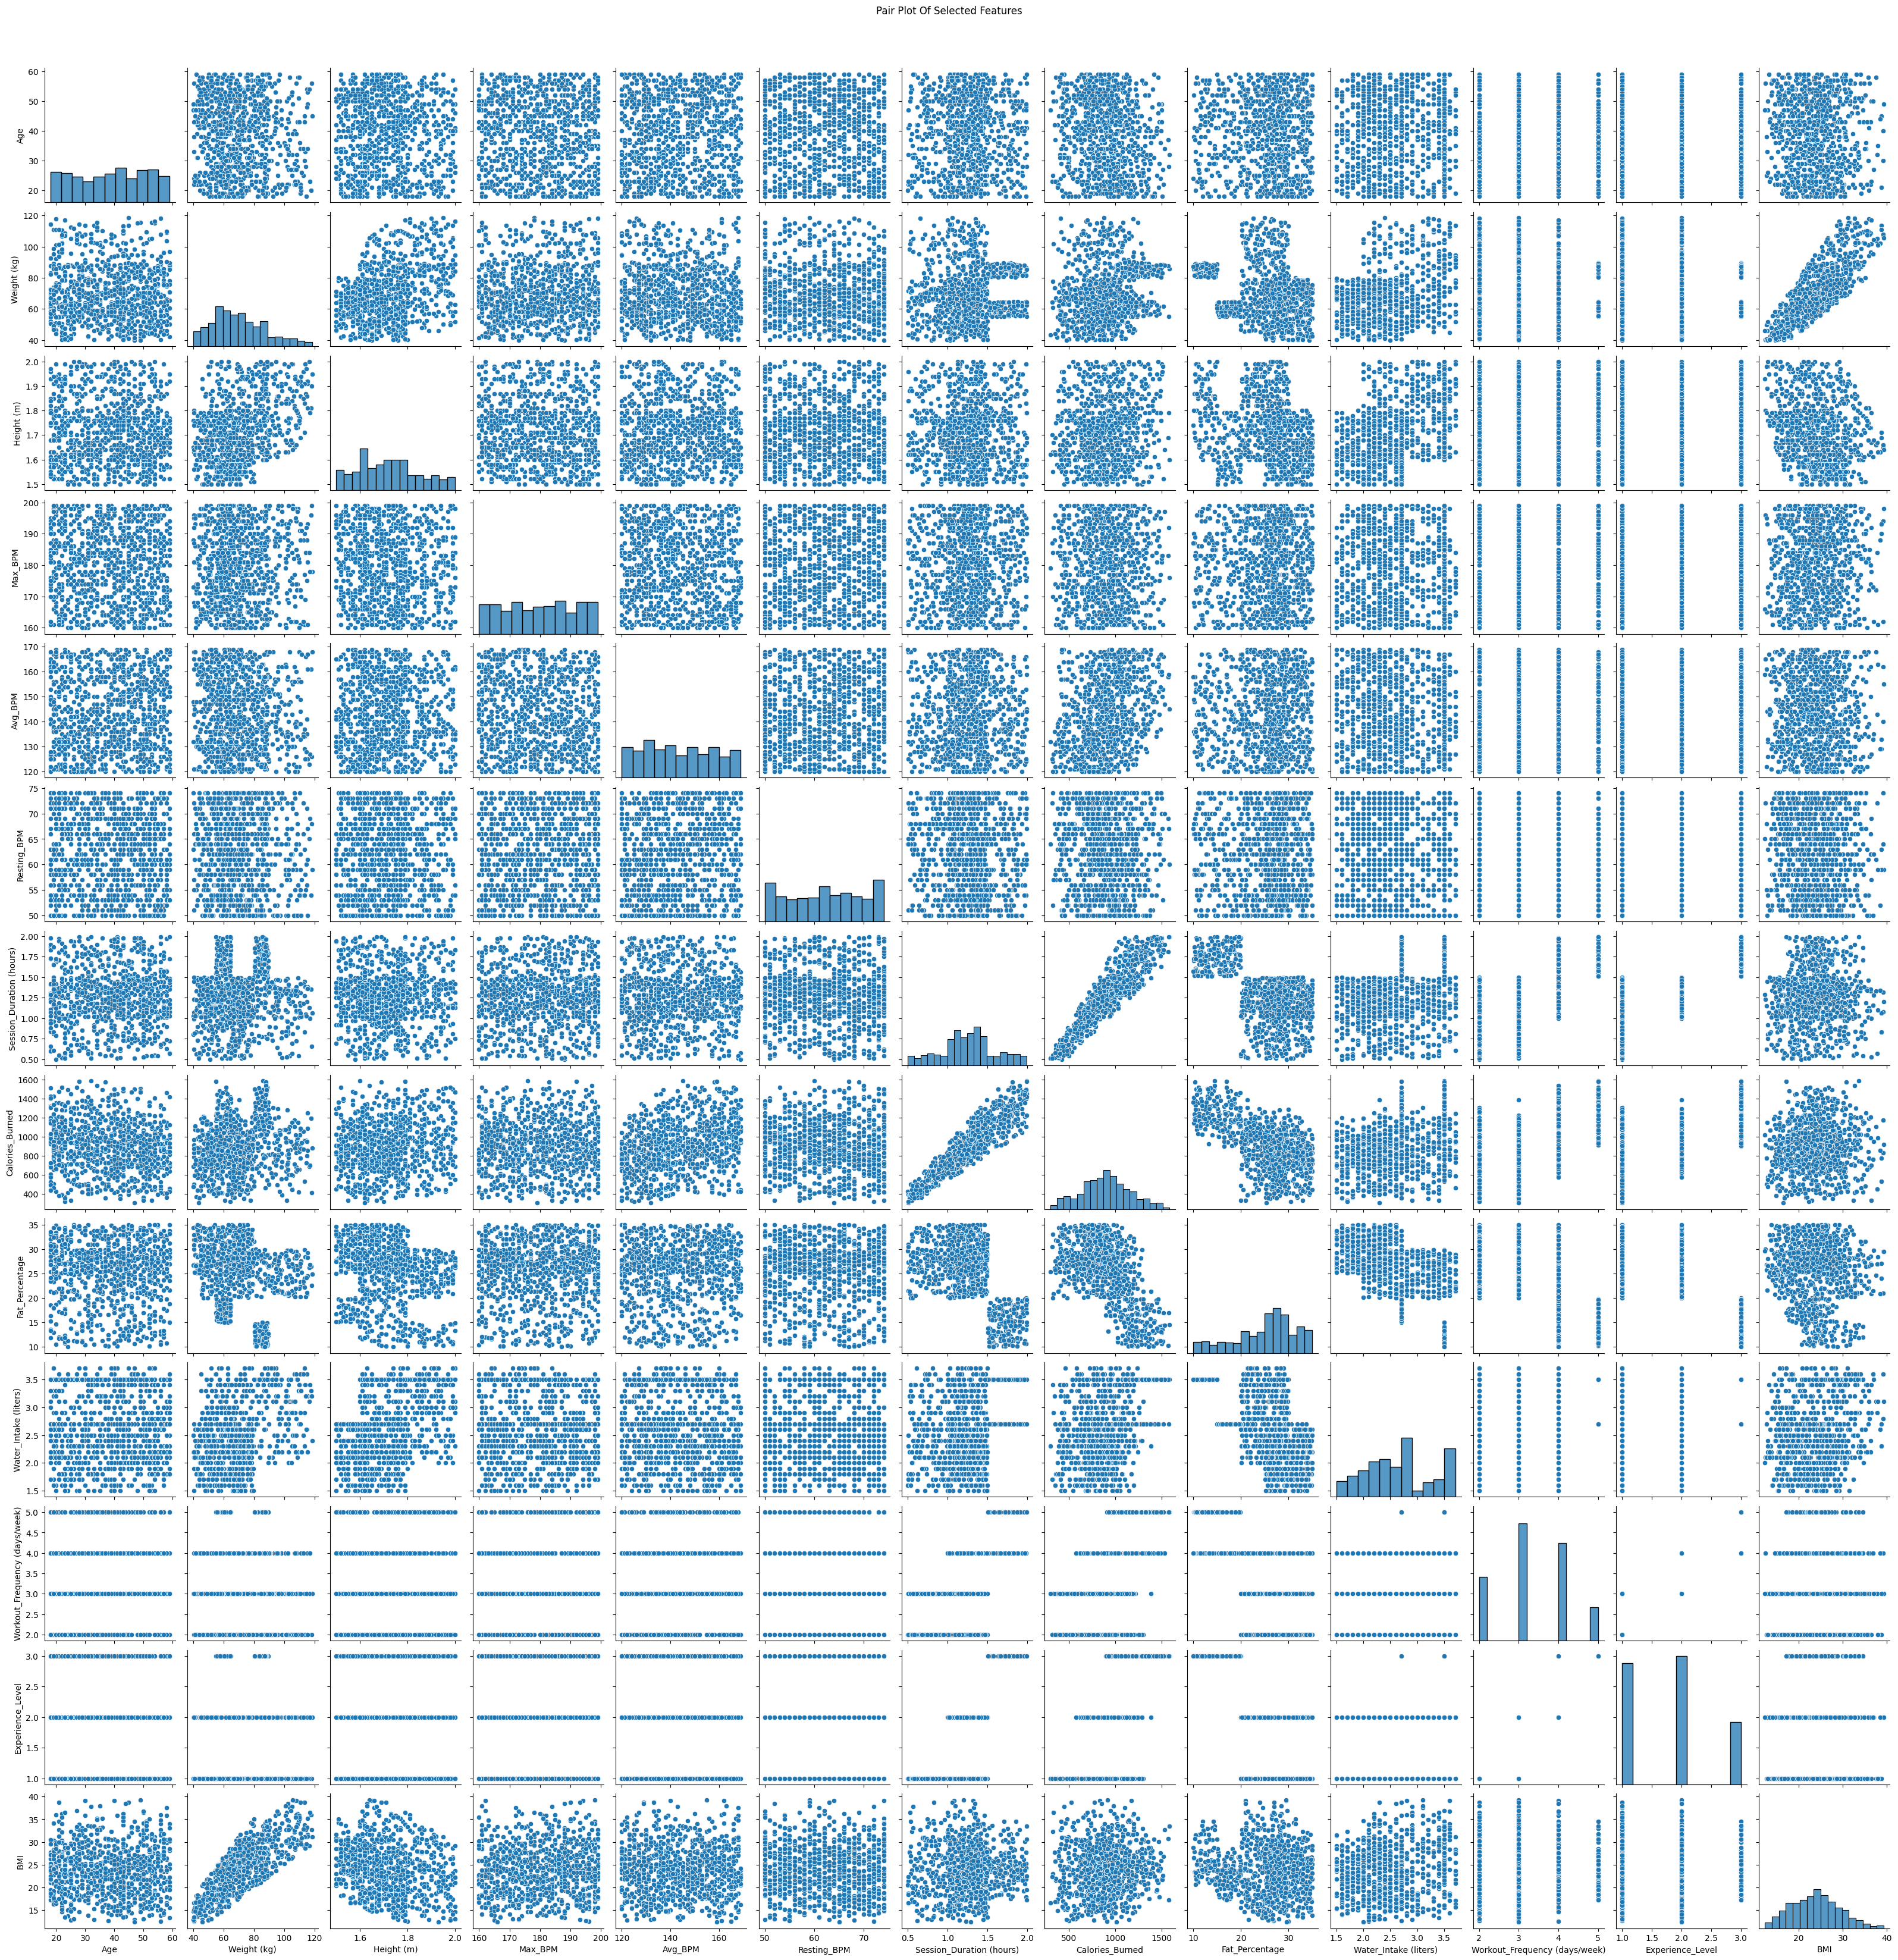

In [46]:
selected_features = encodedGymDataCopy[['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI']]
sns.pairplot(selected_features,palette="Blues")
plt.suptitle("Pair Plot Of Selected Features",y=1.02)
plt.show() 

.

### Conducting Hypothesis Testing

#### Hypothesis on Age , Calories Burned 

#### Hypothesis: Younger individuals burn more calories than older individuals during similar workouts.

Null Hypothesis (H0): There is no significant difference in the number of calories burned between younger and older individuals during similar workouts.

Alternative Hypothesis (H1): Younger individuals burn more calories than older individuals during similar workouts.

<br>

Using t-test , p-value :-

- Will be comparing the p-value with the significance level (0.05):
- If p-value < 0.05, reject the null hypothesis and accept the alternative hypothesis.
- If p-value ≥ 0.05, fail to reject the null hypothesis.

<br>



#### Creating two Data Frames "youngAge" and "old Age"

"youngAge" DataFrame will contain age less than 30 and 

"oldAge" DataFrame will contain age greater than or equal to 30.

In [47]:
youngAge = encodedGymDataCopy[encodedGymDataCopy["Age"] < 30]['Calories_Burned']
oldAge = encodedGymDataCopy[encodedGymDataCopy["Age"] >= 30]['Calories_Burned']

In [51]:
youngAge.head(3) 

3      532.0
9      808.0
14    1195.0
Name: Calories_Burned, dtype: float64

In [52]:
oldAge.head(3)

0    1313.0
1     883.0
2     677.0
Name: Calories_Burned, dtype: float64

##### Shape of the columns "youngAge" and "oldAge"

In [ ]:
print("Shape of youngAge :- ", youngAge.shape)
print("Shape of oldAge :- ", oldAge.shape)

Shape of youngAge :-  (249,)
Shape of oldAge :-  (652,)


As we can see the significant difference of distribution of age in the columns youngAge and oldAge.

.

#### Importing "scipy" for conducting t-test 

In [56]:
from scipy import stats

t_stats , p_value = stats.ttest_ind(youngAge,oldAge,equal_var=False)
print("T-Statistic :- ",t_stats,end="\n")
print("p-value :-",p_value,end="\n\n")


if p_value < 0.05:
    print("p-value is less than significance value, We Reject the null hypothesis",end="\n")
else:
    print("p-value is greater than significance value, We Accept the null hypothesis")

T-Statistic :-  2.361407269142212
p-value :- 0.01865202343616224

p-value is less than significance value, We Reject the null hypothesis


Interpretation

Since the p-value (0.01865202343616224) is less than the significance level of 0.05, we reject the null hypothesis. This means there is a statistically significant difference in the number of calories burned between younger and older individuals during similar workouts.

Conclusion:
Based on the results, we can conclude that younger individuals burn more calories than older individuals during similar workouts. This finding supports our hypothesis and suggests that age plays a significant role in calorie expenditure during exercise.


.

.

.

#### Hypothesis on Gender , Calories Burned 

#### Hypothesis: There is a significant difference in calories burn rates between genders.

Null Hypothesis (H0): There is no significant difference in the calorie burn rates between males and females.

Alternative Hypothesis (H1): There is a significant difference in the calorie burn rates between males and females.

Using t-test , p-value :-

- Will be comparing the p-value with the significance level (0.05):
- If p-value < 0.05, reject the null hypothesis and accept the alternative hypothesis.
- If p-value ≥ 0.05, fail to reject the null hypothesis.


#### Creating two Data Frames "maleData" and "femaleData"

"maleData" DataFrame will contain male data and 

"femaleData" DataFrame will contain female data.

In [57]:
male_data = newGymDataCopy[newGymDataCopy['Gender'] == 'Male']['Calories_Burned']
female_data = newGymDataCopy[newGymDataCopy['Gender'] == 'Female']['Calories_Burned']

In [58]:
male_data.head(3)

0    1313.0
3     532.0
4     556.0
Name: Calories_Burned, dtype: float64

In [59]:
female_data.head(3)

1     883.0
2     677.0
5    1116.0
Name: Calories_Burned, dtype: float64

##### Shape of the columns "male_data" and "female_data"

In [ ]:
print("Shape of male_data :- ", male_data.shape)
print("Shape of female_data :- ", female_data.shape) 

Shape of male_data :-  (440,)
Shape of female_data :-  (461,)


As we can see the significant difference of distribution of age in the columns male_data and female_data.

.

#### Importing "scipy" for conducting t-test 

In [61]:
from scipy import stats

t_stats , p_value = stats.ttest_ind(male_data,female_data,equal_var=False)
print("T-Statistic :- ",t_stats,end="\n")
print("p-value :-",p_value,end="\n\n")


if p_value < 0.05:
    print("p-value is less than significance value, We Reject the null hypothesis",end="\n")
else:
    print("p-value is greater than significance value, We Accept the null hypothesis")

T-Statistic :-  4.5821191335287335
p-value :- 5.266339748794202e-06

p-value is less than significance value, We Reject the null hypothesis


Interpretation:

Since the p-value (5.266339748794202e-06) is much less than the significance level of 0.05, we reject the null hypothesis. This means there is a statistically significant difference in the calorie burn rates between males and females.

Conclusion:

Based on the results, we can conclude that there is a significant difference in calorie burn rates between genders. This finding supports our hypothesis and suggests that gender plays a significant role in calorie expenditure during exercise. The high t-statistic further reinforces that the observed difference in means is substantial and not due to random chance.

.

.

.

#### Hypothesis on Gender , Workout_Type 

#### Hypothesis for Chi-Square Test

Null Hypothesis (H0): There is no association between Gender and Workout_Type.

Alternative Hypothesis (H1): There is an association between Gender and Workout_Type.

<br>

#### Interpret Results:

Using t-test , p-value :-

- Will be comparing the p-value with the significance level (0.05):
- If p-value < 0.05, reject the null hypothesis and accept the alternative hypothesis.
- If p-value ≥ 0.05, fail to reject the null hypothesis.




#### Creating a new table "chiSquareTable" using crosstab to perform further chi-square stats

In [68]:
chiSquareTable = pd.crosstab(newGymDataCopy['Gender'], newGymDataCopy['Workout_Type'])

In [69]:
chiSquareTable

Workout_Type  Cardio  HIIT  Strength  Yoga
Gender                                    
Female           125   107       123   106
Male             112    97       112   119

#### Importing "scipy" for conducting chi-square test 

In [72]:
from scipy import stats

chi2, chi2_p_value, dof, expected = stats.chi2_contingency(chiSquareTable)
print('Chi-Square Statistic:', chi2)
print('p-value:', chi2_p_value)
print('Degrees of Freedom:', dof)
print('Expected Frequencies:', expected)


Chi-Square Statistic: 1.9809009133579347
p-value: 0.5763802400079809
Degrees of Freedom: 3
Expected Frequencies: [[121.26193119 104.37735849 120.23862375 115.12208657]
 [115.73806881  99.62264151 114.76137625 109.87791343]]


In [73]:
if chi2_p_value < 0.05:
    print("p-value is less than significance value, We Reject the null hypothesis",end="\n")
else:
    print("p-value is greater than significance value, We Accept the null hypothesis")

p-value is greater than significance value, We Accept the null hypothesis


Interpretation:

The p-value (0.5763802400079809) is greater than the typical significance level of 0.05. This means we fail to reject the null hypothesis. In other words, there is no statistically significant association between Gender and Workout_Type in this dataset.

Conclusion:

Based on the chi-square test results, we conclude that there is no significant association between Gender and Workout_Type. The observed frequencies of workout types between males and females do not differ significantly.

.

.

.